# Placing N-Queens 
Coding with Claude - Antropic

A simple Python example of backtracking using the classic N-Queens problem. This problem involves placing N chess queens on an N×N chessboard so that no two queens threaten each other.


In [1]:
import time
from IPython.display import clear_output

We start with an empty solution (an array of -1's).
We try placing a queen in each column of the current row.
If a placement is safe, we recursively try to solve for the next row.
If we can't place a queen in any column of the current row, we backtrack by undoing the last placement and trying the next possibility in the previous row.
We continue this process until we either find a valid solution or exhaust all possibilities.

In [5]:
def solve_n_queens(n):
    board = [-1] * n # board is a one dimensional array, see below for details
    solutions = []

    def is_safe(row, col):
        '''
        checking if array can be placed at the specific column 
        by looking at all the previous rows. 
        p.s. i is the row and board[i] is the column value we're checking. 
        '''
        for i in range(row):
            if board[i] == col or \
               board[i] - i == col - row or \
               board[i] + i == col + row:
                return False
        return True
    
    def print_board():
        '''
        printing the board
        '''
        for i in range(n):
            row = ['Q' if j == board[i] else '.' for j in range(n)]
            print(' '.join(row))
        print()
        time.sleep(0.3)
        clear_output(wait=True)

    def backtrack(row):
        if row == n:
            solutions.append(board.copy())
            print("----- We have a solution!-----")
            print_board()
            time.sleep(2)
            return
        
        for col in range(n):
            if is_safe(row, col):
                board[row] = col
                print(f"Placing queen at row {row}, column {col}")
                print_board()
                time.sleep(0.1)  # Pause to see the board state
                backtrack(row + 1)
                board[row] = -1  # Backtrack
                print(f"Backtracking from row {row}, column {col}")
                print_board()
                time.sleep(0.1)  # Pause to see the backtracking
            else:
                print("Unsafe")
                board[row] = col
                print_board()
                time.sleep(0.1)
                board[row] = -1

    backtrack(0)
    return solutions

# Example usage
n = 5
solutions = solve_n_queens(n)
print(f"Found {len(solutions)} solutions:")
for i, solution in enumerate(solutions, 1):
    print(f"Solution {i}:")
    for row in range(n):
        queen_row = ['Q' if col == solution[row] else '.' for col in range(n)]
        print(' '.join(queen_row))
    print()

Found 10 solutions:
Solution 1:
Q . . . .
. . Q . .
. . . . Q
. Q . . .
. . . Q .

Solution 2:
Q . . . .
. . . Q .
. Q . . .
. . . . Q
. . Q . .

Solution 3:
. Q . . .
. . . Q .
Q . . . .
. . Q . .
. . . . Q

Solution 4:
. Q . . .
. . . . Q
. . Q . .
Q . . . .
. . . Q .

Solution 5:
. . Q . .
Q . . . .
. . . Q .
. Q . . .
. . . . Q

Solution 6:
. . Q . .
. . . . Q
. Q . . .
. . . Q .
Q . . . .

Solution 7:
. . . Q .
Q . . . .
. . Q . .
. . . . Q
. Q . . .

Solution 8:
. . . Q .
. Q . . .
. . . . Q
. . Q . .
Q . . . .

Solution 9:
. . . . Q
. Q . . .
. . . Q .
Q . . . .
. . Q . .

Solution 10:
. . . . Q
. . Q . .
Q . . . .
. . . Q .
. Q . . .



Board is represented as a 1D array, index represent the row number and the value represent the column number. 

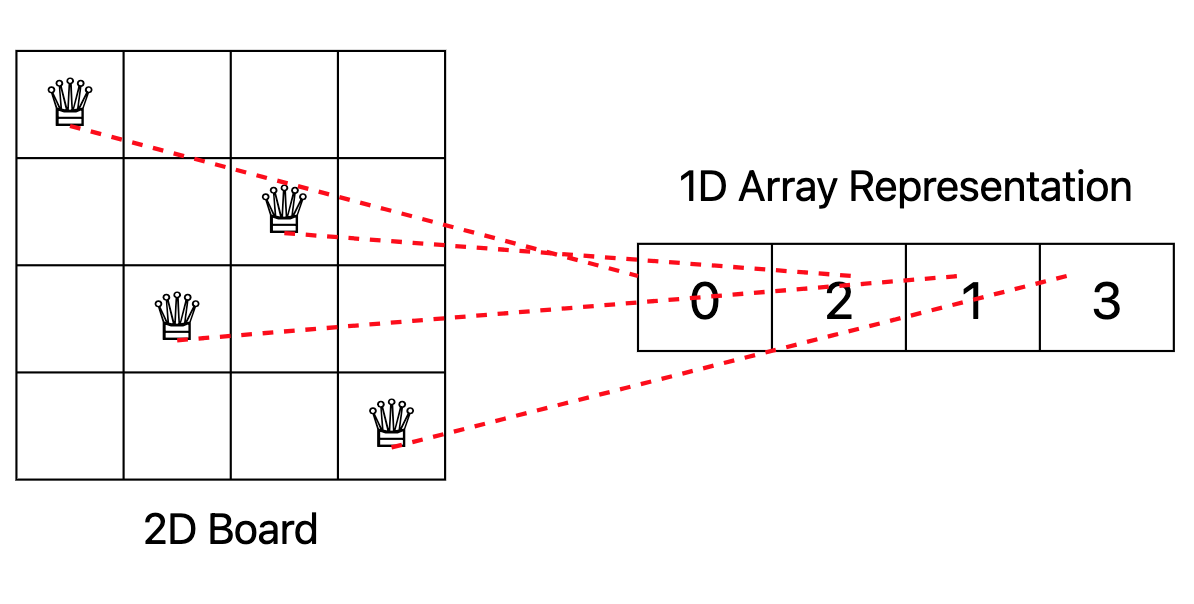


## Safety check

The is_safe function checks if a queen can be placed in a given position without threatening any previously placed queens.


The function checks if it's safe to place a queen at position (row, col) given the queens we've already placed in previous rows.
We loop through all previous rows (for i in range(row)):

This is because queens in rows after row haven't been placed yet, so we only need to check conflicts with queens in rows 0 to row-1.

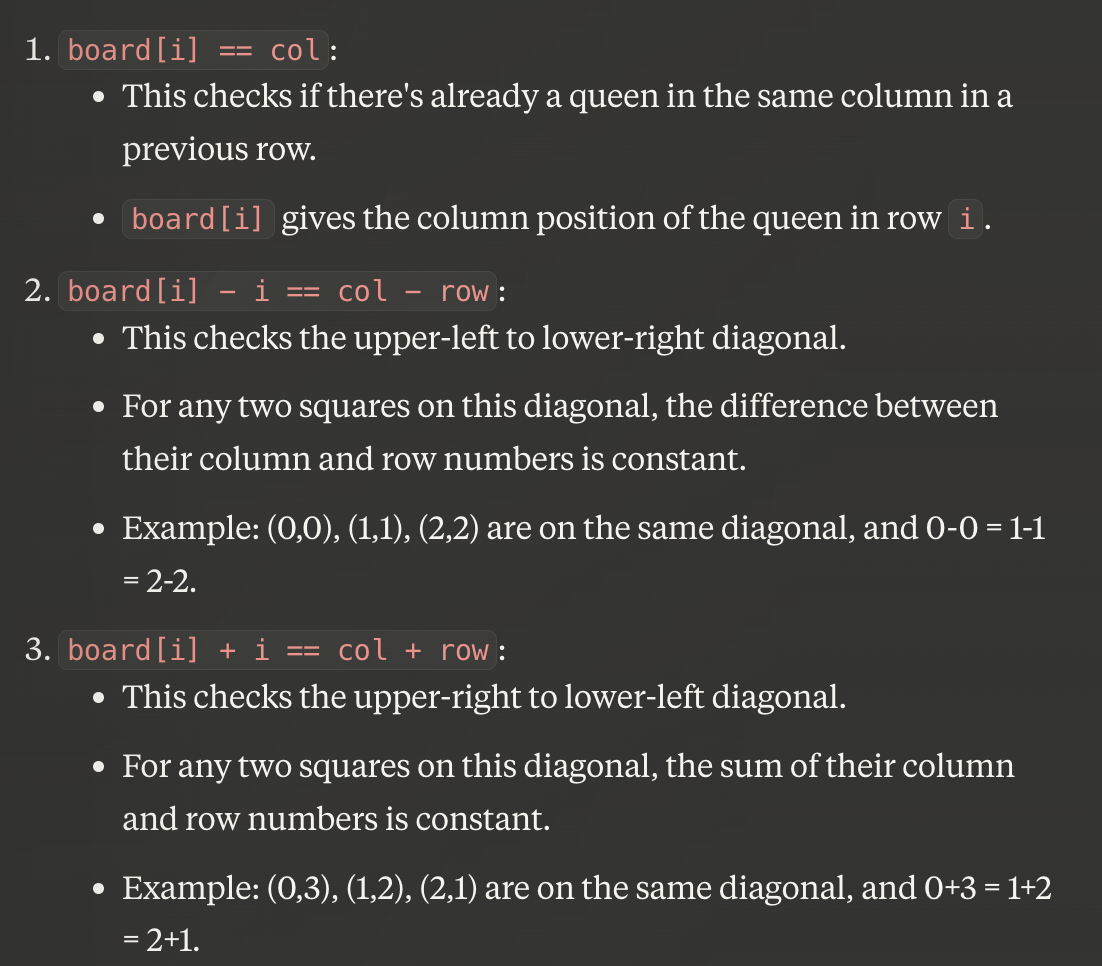

## Backtracking

The backtrack function implements the core backtracking logic, trying different placements and backtracking when necessary.

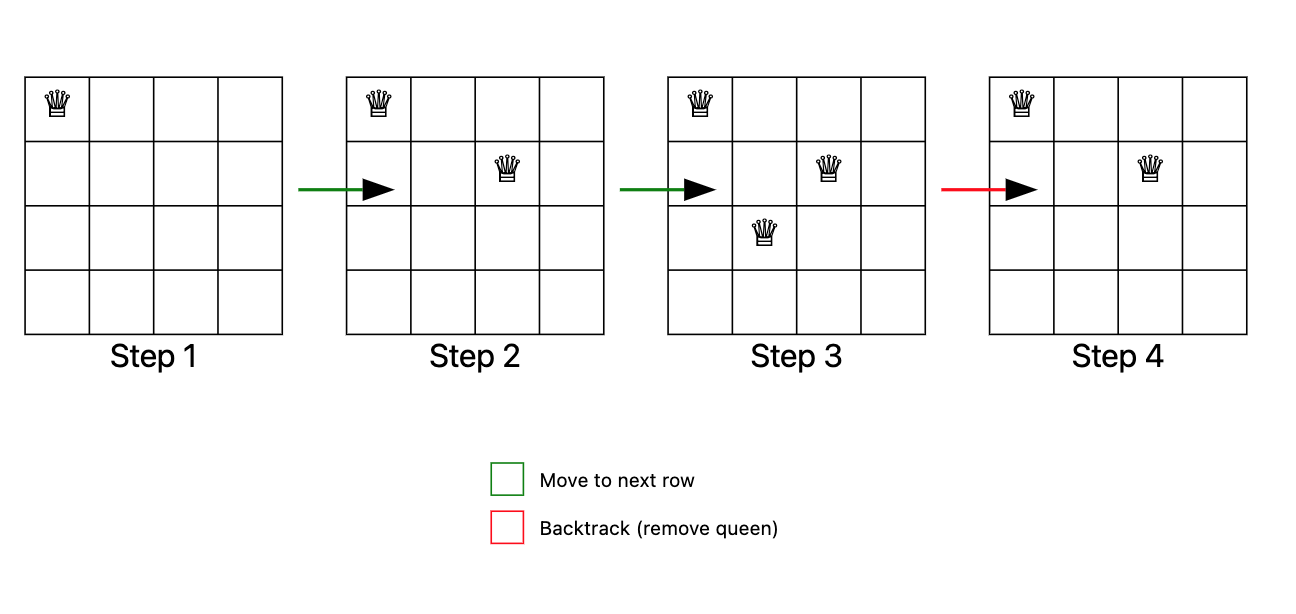